In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
data = pd.read_csv("workers_records.csv")

In [153]:
data

,Unnamed: 0,first_name,last_name,age,rank,salary,experience
0,0,Colleen,Dickson,23,seaman,2205,54.0
1,1,Billy,Sullivan,23,Cook,3823,51.0
2,2,William,Small,46,Engine Officer,-6373,76.0
3,3,Holly,Hull,31,motorman,7816,90.0
4,4,Katrina,Boyd,46,Deck Officer,5404,83.0
...,...,...,...,...,...,...,...
95,95,Tammy,Curtis,35,Cook,2649,85.0
96,96,Lisa,Martinez,22,Deck Officer,3686,9.0
97,97,Joseph,Silva,24,motorman,7783,67.0
98,98,Justin,Burke,27,motorman,7865,96.0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   first_name  88 non-null     object 
 2   last_name   100 non-null    object 
 3   age         100 non-null    int64  
 4   rank        100 non-null    object 
 5   salary      100 non-null    int64  
 6   experience  92 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


видим что в колонке first name есть 8 значений null и в колонке experience таких 5

In [155]:
data.dropna()

,Unnamed: 0,first_name,last_name,age,rank,salary,experience
0,0,Colleen,Dickson,23,seaman,2205,54.0
1,1,Billy,Sullivan,23,Cook,3823,51.0
2,2,William,Small,46,Engine Officer,-6373,76.0
3,3,Holly,Hull,31,motorman,7816,90.0
4,4,Katrina,Boyd,46,Deck Officer,5404,83.0
...,...,...,...,...,...,...,...
95,95,Tammy,Curtis,35,Cook,2649,85.0
96,96,Lisa,Martinez,22,Deck Officer,3686,9.0
97,97,Joseph,Silva,24,motorman,7783,67.0
98,98,Justin,Burke,27,motorman,7865,96.0


In [156]:
data.describe()

,Unnamed: 0,age,salary,experience
count,100.000000,100.000000,100.00000,92.000000
mean,49.500000,33.600000,3787.49000,51.532609
std,29.011492,9.107661,3737.32284,30.207506
min,0.000000,20.000000,-6944.00000,0.000000
25%,24.750000,25.750000,2643.50000,27.250000
50%,49.500000,33.000000,4060.50000,52.000000
75%,74.250000,41.250000,6697.25000,78.250000
max,99.000000,50.000000,7981.00000,100.000000


видим что зарплата есть отрицательная, что явная ошибка. заменим их на Nan

In [157]:
data.loc[data['salary'] < 0, 'salary'] = np.nan

In [158]:
data.describe()

,Unnamed: 0,age,salary,experience
count,100.000000,100.000000,89.000000,92.000000
mean,49.500000,33.600000,4910.752809,51.532609
std,29.011492,9.107661,1994.000617,30.207506
min,0.000000,20.000000,2093.000000,0.000000
25%,24.750000,25.750000,3226.000000,27.250000
50%,49.500000,33.000000,4417.000000,52.000000
75%,74.250000,41.250000,6808.000000,78.250000
max,99.000000,50.000000,7981.000000,100.000000


In [159]:
data.dropna()

,Unnamed: 0,first_name,last_name,age,rank,salary,experience
0,0,Colleen,Dickson,23,seaman,2205.0,54.0
1,1,Billy,Sullivan,23,Cook,3823.0,51.0
3,3,Holly,Hull,31,motorman,7816.0,90.0
4,4,Katrina,Boyd,46,Deck Officer,5404.0,83.0
5,5,Catherine,Howell,35,seaman,3332.0,81.0
...,...,...,...,...,...,...,...
95,95,Tammy,Curtis,35,Cook,2649.0,85.0
96,96,Lisa,Martinez,22,Deck Officer,3686.0,9.0
97,97,Joseph,Silva,24,motorman,7783.0,67.0
98,98,Justin,Burke,27,motorman,7865.0,96.0


в результате преобразований потеряли около 20 процентов базы данных, что не есть хорошо, но для данной задачи не существенно. 

средняя зарплата

In [160]:
data['salary'].mean()

4910.752808988764

максимальный возраст

In [161]:
data['age'].max()

50

средний возраст

In [162]:
data['age'].mean()

33.6

In [163]:
sd = data.pivot_table(index='rank', columns='age', values='salary', aggfunc='mean')

In [164]:
sd

age,20,21,22,23,24,25,26,27,28,29,...,41,42,43,44,45,46,47,48,49,50
rank,,,,,,,,,,,,,,,,,,,,,
Cook,NaN,NaN,3567.0,3359.666667,NaN,3877.0,6737.0,NaN,NaN,4397.0,...,NaN,NaN,NaN,NaN,7675.0,NaN,2802.0,6671.0,NaN,NaN
Deck Officer,NaN,5364.000000,3686.0,NaN,NaN,NaN,2093.0,4655.5,2368.0,NaN,...,NaN,NaN,NaN,3520.0,NaN,5404.0,6468.0,NaN,NaN,3514.0
Engine Officer,NaN,NaN,NaN,4465.000000,7861.0,4602.0,NaN,3664.0,2783.0,NaN,...,NaN,6016.0,NaN,NaN,NaN,NaN,NaN,7498.0,NaN,NaN
motorman,7818.0,NaN,NaN,NaN,7783.0,2848.0,4417.0,7865.0,NaN,4663.5,...,5481.666667,6684.0,6864.5,4987.0,NaN,NaN,3900.0,5150.0,5032.666667,NaN
seaman,NaN,4899.333333,7666.0,2205.000000,3137.0,NaN,4714.0,NaN,NaN,NaN,...,NaN,NaN,3140.0,NaN,7469.0,NaN,NaN,4299.0,NaN,NaN


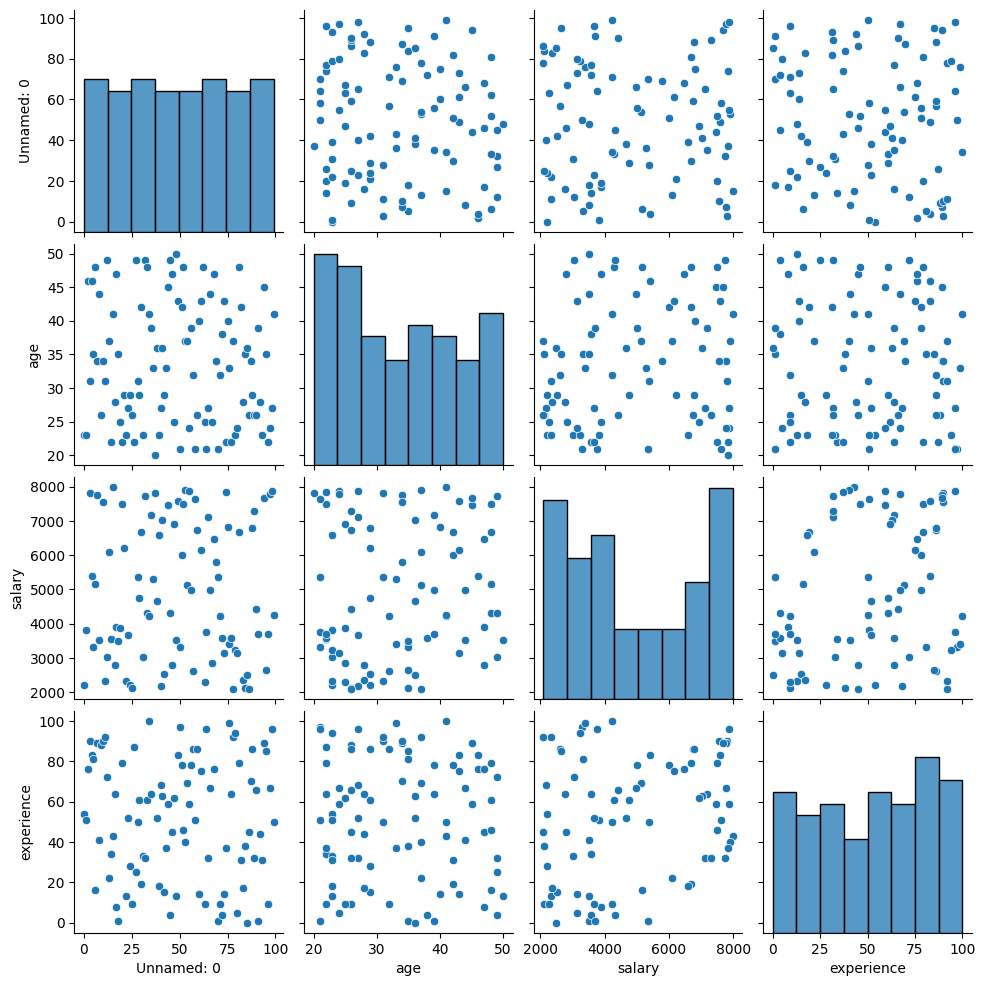

In [165]:
sns.pairplot(data)

In [175]:
data_2 = data.sort_values(by=['age'])

<AxesSubplot: xlabel='age'>

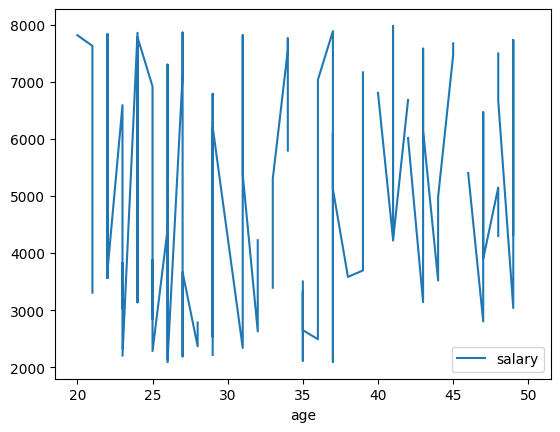

In [176]:
data_2.plot(x="age", y='salary')

зависимостей никаких нет, просто потому что данные генерировались случайно